In [0]:
from sklearn.datasets import load_files
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
newsgroups_train = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'])
text_train, y_train = newsgroups_train.data, newsgroups_train.target

newsgroups_test = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'])
text_test, y_test = newsgroups_test.data, newsgroups_test.target



banned_words = {'and','of','is','the'}

In [0]:
#SVM MODEL 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words = banned_words), SVC())
param_grid = {'svc__gamma':[1, 5, 10], 'tfidfvectorizer__ngram_range':[(1,2)], 'svc__C':[10, 100]}
grid = GridSearchCV(pipe, param_grid, cv = 2)
grid.fit(text_train, y_train)

##running above cell

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 1),
                                               

In [0]:
print("CV Best Estimator: {}".format(grid.best_estimator_))
print("CV Results: {}".format(grid.cv_results_))
print('best RBFSVM2 CV score: {}'.format(grid.best_score_))
print("accuracy: {}".format(grid.score(text_test, y_test)))

CV Best Estimator: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'is', 'the', 'and', 'of'},
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                

NameError: ignored

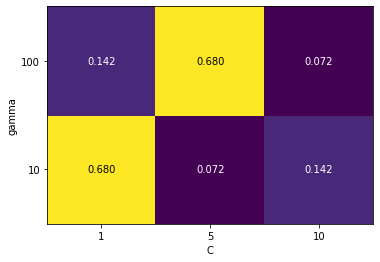

In [0]:
from sklearn.metrics import confusion_matrix
import mglearn
scores = grid.cv_results_['mean_test_score'].reshape(3,2).T
#visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel = 'C', ylabel = 'gamma', cmap = 'viridis', fmt = '%.3f',
    xticklabels = param_grid['svc__gamma'],
    yticklabels = param_grid['svc__C'])
plt.colorbar(heatmap)

In [0]:
print("20 News RBFSVM2 Mean Fit Times:{}".format(grid.cv_results_['mean_fit_time']))

print("20 News RBFSVM accuracy: {}".format(grid.score(text_test, y_test)))

20 News RBFSVM Mean Fit Times:[57.9014957  57.72709918 59.01774347 58.42469752 58.53983212 57.14248967]
20 News RBFSVM accuracy: 0.6537440254912373


In [0]:
print('20 news RBFSVM std: {}'.format(grid.cv_results_['std_test_score']))

20 news RBFSVM std: [0.00141418 0.02686937 0.00132579 0.00141418 0.02686937 0.00132579]


In [0]:
pip install mglearn